# Machine Learning on MNIST dataset (Handwritten digits recognition)
*Upload the notebook to the Kaggle competition: https://www.kaggle.com/c/digit-recognizer/*

**Datasets**

- train.csv: training set containing the label and the 784 pixel values (28x28 images), between 0-255
- test.csv : the set to make predictions over
- sample_submission.csv : example of submission csv format for the competition

**Metric**: accuracy of the classification (% of right predictions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## EDA

In [2]:
train = pd.read_csv('train.csv')
print(train.head())
print(train.info())
print("\n SHape of the dataset:", train.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [9]:
#NaN values in the dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


*--> No missing values*

In [5]:
#Displays 4 handwritten digit images
def display_digits(*args):
    """Picks-up the digits corresponding to the specified integer
    within the train dataset and displays the image
    between 0 and 41999"""
    
    train = pd.read_csv('train.csv')
    args = list(args)
    subset_4digits = train.iloc[args,:]
    print("Handwritten picked-up digits: ", subset_4digits['label'].values)
    subset_4digits.drop(columns=['label'], inplace=True)
    #print(subset_4digits)

    for i, row in subset_4digits.iterrows():
        pixels = row.values.reshape((28,28))
        _ = plt.imshow(pixels, cmap='gray')
        plt.show()
        
    return ""

Handwritten picked-up digits:  [0 1 1 3]


C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


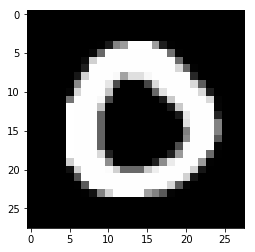

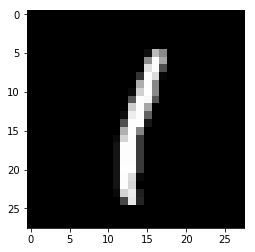

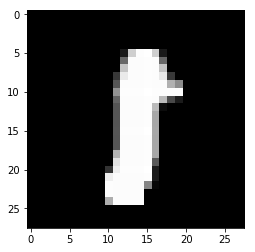

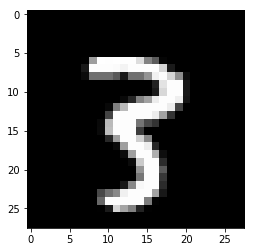

''

In [6]:
display_digits(4,59,5843,24681)

In [7]:
#Analyse the pixels intensity values
subset_pixels = train.iloc[:, 1:]
subset_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


*--> Some pixels have always an intensity of 0 (max=0)*

## Classification Model
### SImple K-nearest
- training dataset has been randomly sampled to 4000 images (out of 42000)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
#LOad training dataset
train = pd.read_csv('train.csv')

Shape of X and Y arrays: ((4000, 784), (4000, 1))


C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


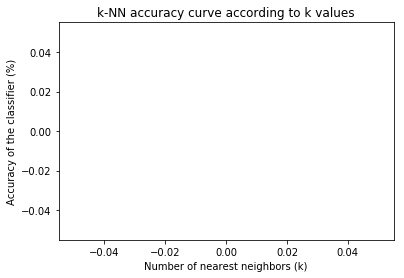

In [20]:
#Sample randomly the dataset using discrete_uniform pick-up
sample = np.random.randint(low=0, high=42001, size=4000).tolist()

#Prepare the X (features) and y (label) arrays for 4000 images
X = train.iloc[sample, 1:].values
y = train.loc[sample, 'label'].values.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4, stratify=y)

#Fine tune the k value
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#Plot the accuracy curve
plt.plot(x=neighbors, y=train_accuracy, label='train accuracy curve')
plt.plot(x=neighbors, y=test_accuracy, label='test accuracy curve')
plt.title('k-NN accuracy curve according to k values')
plt.legend()
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Accuracy of the classifier (%)')
plt.show()

**Best k value** =  for accuracy =   % on the sample training set

### Complex model
- Rescaling pixel intensities to improve resolution (see DataCamp lecture)
- Cropping the images/remove features to take out the pixels with intensity =0 to improve computation
- Rescaling intensity between 0 and 1
- Fine tune the k neighbors
- no missing values --> no need for an Imputer
